# Predictive Maintinance and Analysis of Back Blaze Hard Disk Drives.
### Introduction

Put write up here.

## Data Import and Data Wrangling

In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os 
import glob


In [2]:
os.getcwd()
path = '/Users/Aron/CDS/CDS_492/HDD-Failure'
os.chdir(path)

In [3]:
#read in the data
#make list of all the files 
#files = [f for f in glob.glob("data/*/*.csv")]

df = pd.concat([pd.read_csv(f) for f in glob.glob("data/*/*.csv")],ignore_index = True)


In [38]:
# make lists of column names needed
IDCols = df.columns[0:5]
rawCols = df.columns[6:95:2]
allrawCols = IDCols.append(rawCols)
normCols = df.columns[5:96:2]
allNormCols = IDCols.append(normCols)

In [40]:
IDCols[-1]
print(rawCols[0:1])
df.columns[:8]
print(normCols[0:7])

Index(['smart_1_raw'], dtype='object')
Index(['smart_1_normalized', 'smart_2_normalized', 'smart_3_normalized',
       'smart_4_normalized', 'smart_5_normalized', 'smart_7_normalized',
       'smart_8_normalized'],
      dtype='object')


In [8]:
#turn the date column to an actual date.
df['date'] = pd.to_datetime(df['date'])

In [9]:
# sort by date then group by serial number.
#df = df.sort_values(['date'])
#df = df.groupby(['serial_number'])

In [10]:
#select the drives that have failed
fail = df['failure'] == 1
fail = df[fail]
fail = fail['serial_number']
fail_names = df[df['serial_number'].isin(fail)]

#df_fail =df[df_fail['serial_number']]
#sort the failed drirves by serial number and then by date.

#df_fail.reset_index(drop=True)

fail_names

,date,serial_number,model,capacity_bytes,failure,smart_1_normalized,smart_1_raw,smart_2_normalized,smart_2_raw,smart_3_normalized,...,smart_250_normalized,smart_250_raw,smart_251_normalized,smart_251_raw,smart_252_normalized,smart_252_raw,smart_254_normalized,smart_254_raw,smart_255_normalized,smart_255_raw
17,2017-01-01,Z300KMM3,ST4000DM000,4.000787e+12,0,119.0,221434504.0,NaN,NaN,91.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
88,2017-01-01,Z302DK2R,ST4000DM000,4.000787e+12,0,116.0,109378928.0,NaN,NaN,92.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
246,2017-01-01,Z3051NNA,ST4000DM000,4.000787e+12,0,119.0,215001112.0,NaN,NaN,92.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
257,2017-01-01,S300Z60P,ST4000DM000,4.000787e+12,0,119.0,204581520.0,NaN,NaN,99.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
544,2017-01-01,Z1Z06H5C,ST4000DX000,4.000787e+12,0,117.0,130295575.0,NaN,NaN,90.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13221292,2016-10-02,Z302F0C2,ST4000DM000,4.000787e+12,0,114.0,59586600.0,NaN,NaN,99.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13221406,2016-10-02,Z1Z058NN,ST4000DX000,4.000787e+12,0,120.0,732471.0,NaN,NaN,91.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13221417,2016-10-02,S300ZS0Z,ST4000DM000,4.000787e+12,0,111.0,35144768.0,NaN,NaN,92.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13221449,2016-10-02,W300R8AC,ST4000DM000,4.000787e+12,0,119.0,210218736.0,NaN,NaN,91.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
#get the raw data. Start with the normalized data given. 
#fail_raw = fail_names[allrawCols]
#sort it 
#fail_raw = fail_raw.sort_values(by = ['serial_number','date'])
#fail_raw = fail_raw.reset_index()

In [12]:
fail_norm = fail_names[IDCols.append(normCols)]
fail_norm = fail_norm.sort_values(['serial_number', 'date']).reset_index()


In [13]:

#fail_norm[fail_norm['smart_198_normalized'].isna()]
#df[df['smart_198_normalized'].isna()].sum

In [14]:
#visualize the missing data
fail_norm.isna().sum()
#Wow, there is a lot of NA values in this 

index                 0
date                  0
serial_number         0
model                 0
capacity_bytes        0
failure               0
smart_1_raw           0
smart_2_raw       57066
smart_3_raw           0
smart_4_raw           0
smart_5_raw           0
smart_7_raw           0
smart_8_raw       57066
smart_9_raw           0
smart_10_raw          0
smart_11_raw      61219
smart_12_raw          0
smart_13_raw      63374
smart_15_raw      63374
smart_22_raw      63374
smart_183_raw     11718
smart_184_raw      8132
smart_187_raw      8132
smart_188_raw      8132
smart_189_raw      8132
smart_190_raw      8132
smart_191_raw      7610
smart_192_raw       143
smart_193_raw       474
smart_194_raw         0
smart_195_raw     56261
smart_196_raw     55242
smart_197_raw         0
smart_198_raw         0
smart_199_raw         0
smart_200_raw     61219
smart_201_raw     63374
smart_220_raw     63108
smart_222_raw     63108
smart_223_raw     62777
smart_224_raw     63108
smart_225_raw   

In [15]:
fail_norm['model'].value_counts()

ST4000DM000                48460
ST8000DM002                 3536
ST4000DX000                 2355
Hitachi HDS5C3030ALA630     1907
HGST HMS5C4040BLE640        1797
Hitachi HDS723030ALA640      961
WDC WD30EFRX                 779
HGST HMS5C4040ALE640         767
WDC WD60EFRX                 721
ST6000DX000                  698
ST500LM012 HN                331
Hitachi HDS5C4040ALE630      279
WDC WD5000LPVX               216
TOSHIBA MQ01ABF050           157
ST3160318AS                  143
TOSHIBA MD04ABA400V          109
WDC WD1600AAJS                62
ST320LT007                    35
WDC WD10EACS                  25
WDC WD5000LPCX                21
ST8000NM0055                  15
Name: model, dtype: int64

Now the drives that have failed are completly sorted, fiirst by serial number then by date.  might need to group_by in order for each serial number to be trated as a single series. not sure though. 

Now lets try start to interrogate the data

In [16]:
#Lets see how many NA's are across the whole data set.
print(df[allrawCols].isna().sum()/len(df))


date                    0.000000
serial_number           0.000000
model                   0.000000
capacity_bytes          0.000000
failure                 0.000000
smart_1_normalized      0.000032
smart_2_normalized      0.641019
smart_3_normalized      0.000032
smart_4_normalized      0.000032
smart_5_normalized      0.000032
smart_7_normalized      0.000032
smart_8_normalized      0.641019
smart_9_normalized      0.000032
smart_10_normalized     0.000032
smart_11_normalized     0.960527
smart_12_normalized     0.000032
smart_13_normalized     1.000000
smart_15_normalized     1.000000
smart_22_normalized     0.999394
smart_183_normalized    0.503583
smart_184_normalized    0.387593
smart_187_normalized    0.387593
smart_188_normalized    0.387593
smart_189_normalized    0.387593
smart_190_normalized    0.387593
smart_191_normalized    0.371246
smart_192_normalized    0.001263
smart_193_normalized    0.012156
smart_194_normalized    0.000032
smart_195_normalized    0.843953
smart_196_

In [17]:

#Make sure that the NA's arent associated with the failure lines.
df['failure'].sum()/len(df.serial_number.unique())
 

0.008550588071057132

In [18]:
#Make sure that the NA's arent associated with just the failure lines.
fails = df['failure'] == 1
fails = df[fails]
#fails = fails['serial_number']
#fails[allrawCols].isna().sum()

In [ ]:
#so what we have is a number of columns that seem to have little information.  
#Some are completly filled with NA'sand some are well over 80% NA.  
#reading literature about what each SMART diagnostic measures tells us that some of the columns are manufacture specific,
# some are for solid state hard drives, and thus not applicable to the type of drive in the data center.


In [20]:
#check the corrolation matrix
corrmat =df[normCols].corr()

<AxesSubplot:>

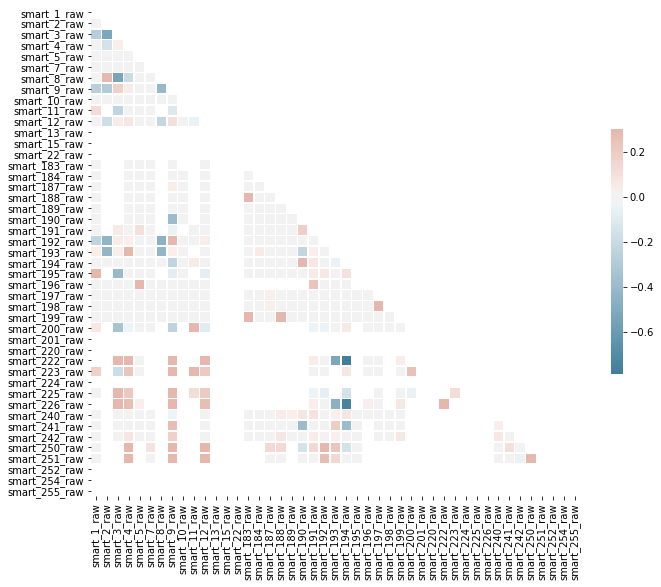

In [24]:
mask = np.triu(np.ones_like(corrmat, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
#plot the matrix
sns.heatmap(corrmat, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [ ]:
# there are a lot of null values.  lets clear that up.  

In [39]:
# Remove lines that are less than a certain threshold.
df_80 = df[normCols].loc[:, df[normCols].isna().mean() < .80]
df_20 = df[normCols].loc[:, df[normCols].isna().mean() <.20]

<AxesSubplot:>

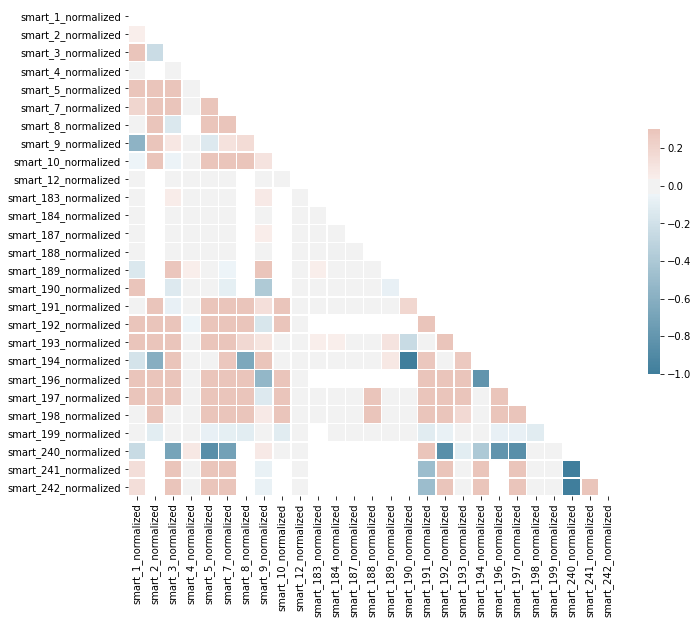

In [41]:
#check the corrolation plot again
corrmat =df_80.corr()
mask = np.triu(np.ones_like(corrmat, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
#plot the matrix
sns.heatmap(corrmat, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

<AxesSubplot:>

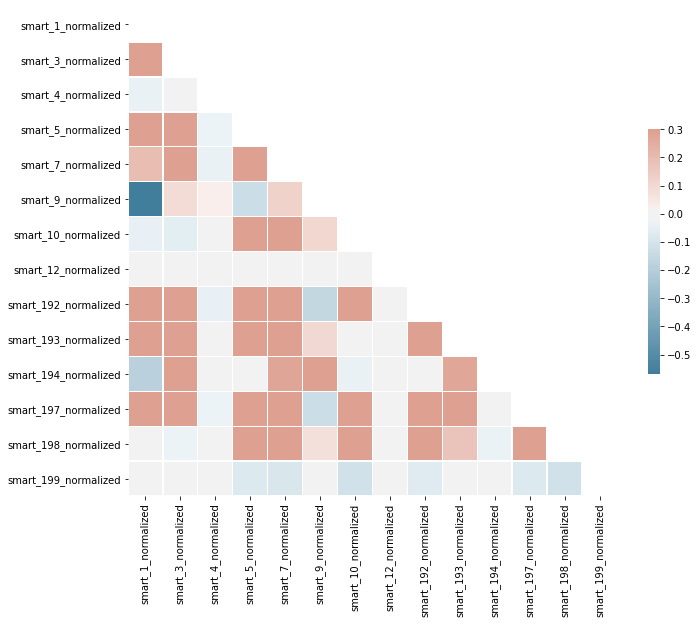

In [42]:
#check the corrolation plot again
corrmat =df_20.corr()
mask = np.triu(np.ones_like(corrmat, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
#plot the matrix
sns.heatmap(corrmat, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

### Colinearity summary
The colinearity heatmaps look pretty good.  The highest value in the less than 20% of the columns are NA is just above .5, and is the assocaiton between smart 9 and smart 1.  This actually makes sense since smart 1 is the read error rate, and smart 9 is the time that the HDD has been running.there are quite a few rows that have basically zero corrolation.  The majority of corrolations in the heatmap are negative corrolations around 0.3 and below.   

## Impute data ??
I dont like the idea of adding in data.  Id rather use methods that can handle missing data.

### Simple Classification

In [ ]:
df[normCols].corr()
#only run this once, takes a long time 

In [ ]:
df_80.corr()


In [ ]:
df_20.corr()

In [ ]:
from sklearn.preprocessing import StandardScaler
# scale the data

# Separating out the features
x = fail_raw.loc[:, rawCols].values
# Separating out the target
y = fail_raw.loc[:,['failure']].values
# Standardizing the features
x = StandardScaler().fit_transform(x)

In [ ]:
pd.x.describe


In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])